In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

In [90]:
game_sales = pd.read_csv('game_sales.csv', index_col = 0)
metacritic_reviews = pd.read_csv('metacritic_reviews.csv', index_col = 0)
gamespot_reviews = pd.read_csv('gamespot_reviews.csv', index_col = 0)
gamespot_w_sales = pd.read_csv('gamespot_w_sales.csv', index_col = 0)
metacritic_w_sales = pd.read_csv('metacritic_w_sales.csv', index_col = 0)


In [91]:
box_office_video_game_movies = pd.read_csv('box_office_video_game_movies.csv', index_col = 0)

In [92]:
# metacritic_wo_0 = metacritic_w_sales.loc[metacritic_w_sales['Global'] > 0]

In [93]:
metacritic_w_sales

,Game,metacritic_score,metacritic_review_count,user_score,user_review_count,content_rating,genres,release_year,Publisher,global_unit_sales
0,Red Dead Redemption 2,97,33,7.7,2413.0,M,"['Action Adventure', ' Open-World']",2018,Rockstar Games,5.77
1,Metal Gear Solid V: The Phantom Pain,95,10,7.4,1111.0,M,"['Modern', ' Modern', ' Action Adventure', ' O...",2015,Konami Digital Entertainment,0.83
2,Inside,93,87,8.3,629.0,M,"['Action', ' Platformer', ' 2D']",2016,NaN,0.00
3,The Witcher 3: Wild Hunt,91,13,9.2,4585.0,M,"['Action RPG', ' Role-Playing', ' Action RPG']",2015,Namco Bandai Games,1.74
4,Rayman Legends,91,6,7.9,243.0,E10+,"['Platformer', ' 2D', ' Action', ' Platformer'...",2014,Ubisoft,0.38
...,...,...,...,...,...,...,...,...,...,...
340,Nba Live 14,36,14,3.1,89.0,E,"['Arcade', ' Sports', ' Traditional', ' Team',...",2013,EA Sports,0.24
341,Fru,84,24,6.8,37.0,E,"['Miscellaneous', ' Puzzle', ' Action']",2016,NaN,0.00
342,Fantasia: Music Evolved,77,48,7.5,70.0,E10+,"['Music', ' Action', ' Miscellaneous', ' Rhyth...",2014,Disney Interactive Studios,0.19
343,The Surge,74,17,7.1,72.0,M,"['Role-Playing', ' Action RPG']",2017,Koch Media,0.12


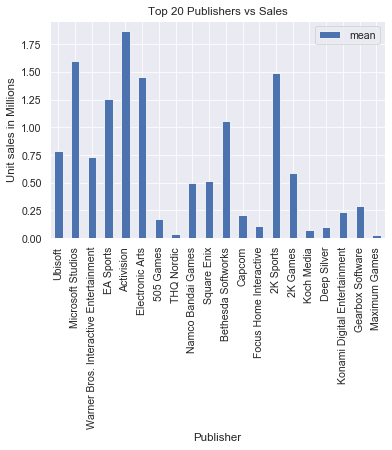

In [95]:
# plot one - publisher by gobal sales

publisher_sales = metacritic_w_sales.groupby('Publisher')['global_unit_sales'].describe().sort_values('count', ascending = False)[0:20]    

ax = publisher_sales.plot.bar(y = 'mean')
ax.set_ylabel('Unit sales in Millions')
ax.set_xlabel('Publisher')
ax.set_title('Top 20 Publishers vs Sales')

plt.savefig('.png')

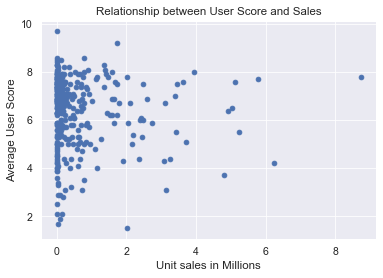

In [109]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(metacritic_w_sales['global_unit_sales'], metacritic_w_sales['user_score'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Average User Score")
ax.set_title('Relationship between User Score and Sales')


plt.show()

plt.savefig('.png')

In [110]:
metacritic_w_sales[['global_unit_sales', 'user_score']].corr()

,global_unit_sales,user_score
global_unit_sales,1.000000,-0.055728
user_score,-0.055728,1.000000


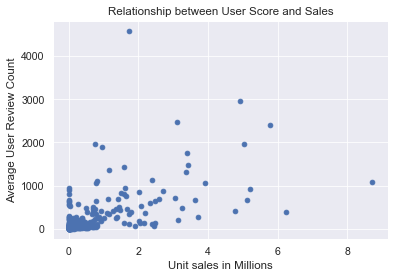

In [111]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(metacritic_w_sales['global_unit_sales'], metacritic_w_sales['user_review_count'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Average User Review Count")
ax.set_title('Relationship between User Score and Sales')


plt.show()

In [112]:
metacritic_w_sales[['global_unit_sales', 'user_review_count']].corr()

,global_unit_sales,user_review_count
global_unit_sales,1.000000,0.578905
user_review_count,0.578905,1.000000


In [113]:
# based on the graphs above we came to the following conclusions

# for the publishers bar chart we saw that the 20 most popular publishers had no real correlation
# to the sales of their games. Some sold well and others didnt

# for the 2 scatter plots we saw that the amount of users who reviewed the game heavily correlated
# to sales for the game whereas the actual rating those users gave it had much less correlation

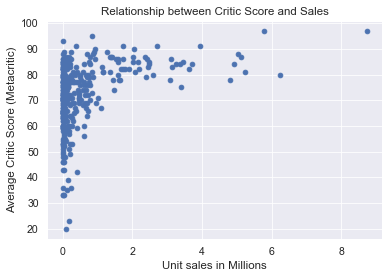

In [114]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(metacritic_w_sales['global_unit_sales'], metacritic_w_sales['metacritic_score'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Average Critic Score (Metacritic)")
ax.set_title('Relationship between Critic Score and Sales')


plt.show()

In [115]:
metacritic_w_sales[['global_unit_sales', 'metacritic_score']].corr()

,global_unit_sales,metacritic_score
global_unit_sales,1.000000,0.398667
metacritic_score,0.398667,1.000000


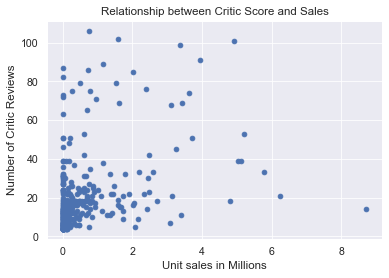

In [116]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(metacritic_w_sales['global_unit_sales'], metacritic_w_sales['metacritic_review_count'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Number of Critic Reviews")
ax.set_title('Relationship between Critic Score and Sales')


plt.show()

In [117]:
metacritic_w_sales[['global_unit_sales', 'metacritic_review_count']].corr()

,global_unit_sales,metacritic_review_count
global_unit_sales,1.000000,0.364567
metacritic_review_count,0.364567,1.000000


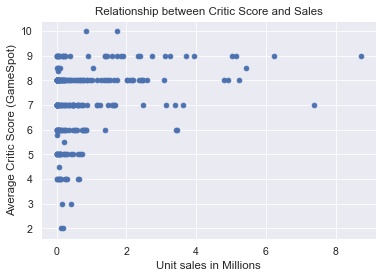

In [118]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(gamespot_w_sales['global_unit_sales'], gamespot_w_sales['score'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Average Critic Score (GameSpot)")
ax.set_title('Relationship between Critic Score and Sales')


plt.show()

In [119]:
gamespot_w_sales[['global_unit_sales', 'score']].corr()

,global_unit_sales,score
global_unit_sales,1.000000,0.298152
score,0.298152,1.000000


In [120]:
metacritic_w_users = metacritic_w_sales.loc[metacritic_w_sales['user_review_count'] > 10]

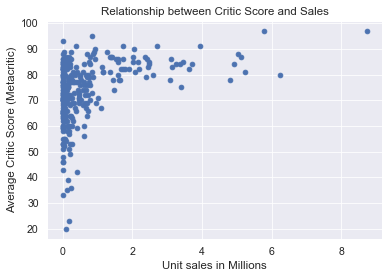

In [121]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(metacritic_w_users['global_unit_sales'], metacritic_w_users['metacritic_score'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Average Critic Score (Metacritic)")
ax.set_title('Relationship between Critic Score and Sales')


plt.show()

In [122]:
gamespot_w_sales[['global_unit_sales', 'score']].corr()

,global_unit_sales,score
global_unit_sales,1.000000,0.298152
score,0.298152,1.000000


In [123]:
# Above we got the correlation and scatter plot for the user review count and the total sales globally


# we found that all 3 had some correletion, betweeen .29 and .39 which is good but lower than the
# correlation with the user review count


# we also checked the user score only gor games with at least 5 reviews as an attempt to try and
# not skew the data with scores that have only 1 review and it was still lower than critic scores

In [124]:
# going forward we will sort by review count, find the most popular games by the review count 
# which could tell us which game could be turned into a movie

In [125]:
top_20_games_by_sales = metacritic_w_sales.sort_values('global_unit_sales', ascending = False).head(20)

Text(0.5, 1.0, 'Review Count for Top 20 Games Sold')

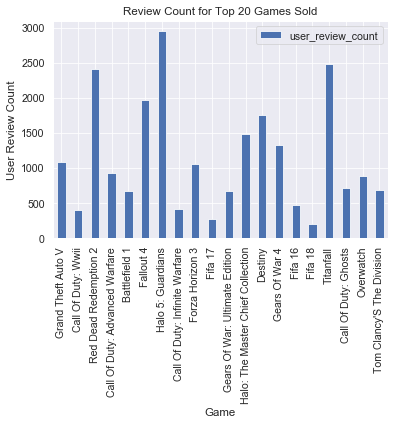

In [126]:

ax = top_20_games_by_sales.plot.bar(x = 'Game', y = 'user_review_count')
ax.set_ylabel('User Review Count')
ax.set_xlabel('Game')
ax.set_title('Review Count for Top 20 Games Sold')

In [127]:
# based on the top 20 games sold most had a lot of reviews and the ones that didnt
# like fifa are games that have new releases every year

Text(0.5, 1.0, 'Sales by Content Rating')

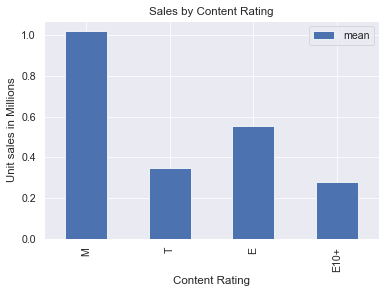

In [128]:
publisher_sales = metacritic_w_sales.groupby('content_rating')['global_unit_sales'].describe().sort_values('count', ascending = False)[0:20]    

ax = publisher_sales.plot.bar(y = 'mean')
ax.set_ylabel('Unit sales in Millions')
ax.set_xlabel('Content Rating')
ax.set_title('Sales by Content Rating')

Text(0.5, 1.0, 'User Review Count by Content Rating')

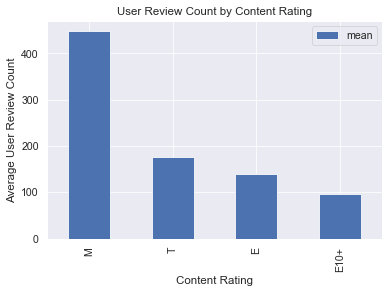

In [129]:
publisher_sales = metacritic_w_sales.groupby('content_rating')['user_review_count'].describe().sort_values('count', ascending = False)[0:20]    

ax = publisher_sales.plot.bar(y = 'mean')
ax.set_ylabel('Average User Review Count')
ax.set_xlabel('Content Rating')
ax.set_title('User Review Count by Content Rating')

In [130]:
# Based on the graphs above the best selling and most reviewed games are Mature games by a large margin    

In [131]:
box_office_video_game_movies.describe()

,Release date,Worldwide box office
count,38.000000,3.800000e+01
mean,2007.710526,1.360747e+08
std,7.522607,1.379859e+08
min,1993.000000,9.232100e+04
25%,2003.250000,1.284763e+07
50%,2007.500000,9.851549e+07
75%,2013.500000,2.404201e+08
max,2020.000000,4.390489e+08


In [132]:
box_office_video_game_movies.sort_values('Worldwide box office').head()

,Title,Release date,Worldwide box office,Distributor,Original game publisher
35,Dead Trigger,2019,92321,Saban Films,Madfinger Games
17,Postal,2007,146741,Vivendi Entertainment,Ripcord Games
20,Far Cry,2008,743634,20th Century Fox,Ubisoft
23,Tekken,2010,967369,Warner Bros. Pictures,Bandai Namco Games
1,Double Dragon,1994,2341309,Gramercy Pictures,Technōs Japan


In [86]:
movies_after_2012 = box_office_video_game_movies.loc[box_office_video_game_movies['Release date'] >= 2013].sort_values('Worldwide box office', ascending = False)    
movies_after_2012['Worldwide box office'] = [x/1000000 for x in movies_after_2012['Worldwide box office']]

In [87]:
# Live Action movies on average made $136 million

# all but 4 of 37 movies made $2.3 million or more

# of the 10 live action video game movies only 2 made less than $200 million

# the only movie that did really poorly was dead trigger which was an android/ios game

# as in the graph below the only other movie that made less than @200 million was hitman 
# but it still did fairly well overall despite being seen as a very bad movie 
# (avg score of 31 as per rottentomatoes, imdb and metacritic)

# movies like warcraft also did poorly in ratings and made a lot of money

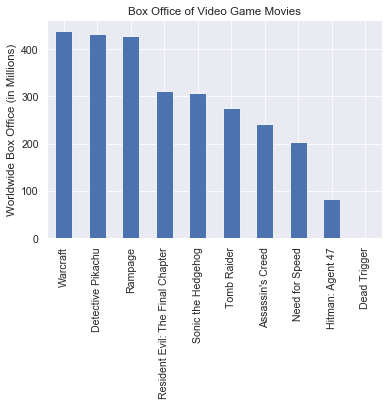

In [97]:
ax2 = movies_after_2012.groupby('Title')['Worldwide box office'].sum().sort_values(ascending = False).plot(kind = 'bar', title = 'Box Office of Video Game Movies')
ax2.set_ylabel('Worldwide Box Office (in Millions)')
ax2.set_xlabel('')

plt.savefig('Box_office_video_game_movies.png')

In [4]:
top_20_games_by_review_count = metacritic_w_sales.sort_values('user_review_count', ascending = False).head(20)

In [9]:
top_20_games_by_review_count

,Game,metacritic_score,metacritic_review_count,user_score,user_review_count,content_rating,genres,release_year,Publisher,global_unit_sales
3,The Witcher 3: Wild Hunt,91,13,9.2,4585.0,M,"['Action RPG', ' Role-Playing', ' Action RPG']",2015,Namco Bandai Games,1.74
36,Halo 5: Guardians,84,101,6.4,2950.0,T,"['Shooter', ' Sci-Fi', ' Sci-Fi', ' Action', '...",2015,Microsoft Studios,4.92
20,Titanfall,86,68,6.7,2485.0,M,"['Shooter', ' Sci-Fi', ' Miscellaneous', ' Gen...",2014,Electronic Arts,3.11
0,Red Dead Redemption 2,97,33,7.7,2413.0,M,"['Action Adventure', ' Open-World']",2018,Rockstar Games,5.77
10,Fallout 4,88,39,6.5,1971.0,M,"['General', ' Role-Playing', ' Western-Style']",2015,Bethesda Softworks,5.03
282,Quantum Break,77,106,7.1,1954.0,M,"['General', ' Action', ' General']",2016,Microsoft Studios,0.76
170,Sea Of Thieves,69,71,5.0,1890.0,T,"['Role-Playing', ' Massively Multiplayer']",2018,Microsoft Studios,0.96
126,Destiny,75,11,5.5,1760.0,T,"['Shooter', ' Sci-Fi', ' Action', ' Shooter', ...",2014,Activision,3.41
269,Halo: The Master Chief Collection,85,69,7.5,1479.0,M,"['Miscellaneous', ' Compilation', ' Action', '...",2014,Microsoft Studios,3.44
21,Rise Of The Tomb Raider,86,102,8.0,1427.0,M,"['Fantasy', ' Action Adventure', ' General', '...",2015,Square Enix,1.58


In [54]:
import ast
metacritic_w_sales['genres'] = metacritic_w_sales['genres'].apply(lambda x: ast.literal_eval(x))

# all_genres = []
# for x in top_20_games_by_review_count['genres']:
#     for y in x:
#         all_genres.append(y.lstrip())
        

In [26]:
from collections import Counter

In [27]:
x = Counter(all_genres)

In [28]:
# action/adventure = 250
# RPG. = 36
# Open-World = 24
# Shooter = 61
# Racing = 29

# not including sports as that is already based off of a real life event and it does not make
# sense to adapt that into any kind of movie

# top 5 genres of top 20 games 

# action/adventure 
# shooter 
# open world
# sci-fi
# rpg

In [55]:
test = metacritic_w_sales

In [58]:
test['Action/Adventure'] = [1 if 'Action' in (' '.join(x)) else 0 for x in test['genres']]
test['RPG'] = [1 if 'Role-Playing' in (' '.join(x)) else 0 for x in test['genres']]
test['Open-World'] = [1 if 'Open-World' in (' '.join(x)) else 0 for x in test['genres']]
test['Shooter'] = [1 if 'Shooter' in (' '.join(x)) else 0 for x in test['genres']]
test['Racing'] = [1 if 'Racing' in (' '.join(x)) else 0 for x in test['genres']]
test['Sci-fi'] = [1 if 'Sci-Fi' in (' '.join(x)) else 0 for x in test['genres']]

In [59]:
test2 = test.head(20).sort_values('user_review_count', ascending = False)

In [63]:
test2.sum()

Game                       The Witcher 3: Wild HuntRed Dead Redemption 2F...
metacritic_score                                                        1784
metacritic_review_count                                                  520
user_score                                                             144.3
user_review_count                                                      16080
content_rating                                 MMMMETE10+MMTME10+TEMEE10+EEE
genres                     [Action RPG,  Role-Playing,  Action RPG, Actio...
release_year                                                           40313
global_unit_sales                                                      25.55
Action/Adventure                                                          14
RPG                                                                        3
Open-World                                                                 3
Shooter                                                                    3

In [61]:
test.sum()

Game                       Red Dead Redemption 2Metal Gear Solid V: The P...
metacritic_score                                                       24887
metacritic_review_count                                                 7095
user_score                                                            2119.5
user_review_count                                                      78922
content_rating             MMMME10+TEME10+TMMEMETEE10+EEMMTEMME10+ETTMME1...
genres                     [Action Adventure,  Open-World, Modern,  Moder...
release_year                                                          695447
global_unit_sales                                                     201.23
Action/Adventure                                                         219
RPG                                                                       36
Open-World                                                                24
Shooter                                                                   53